# Course Name: Visualisation for Data Analytics
# Objective: Text Data Analytics

## Import Libraries

In [64]:
# You may need some of the following libraries for finishing this exercise
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iwatt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Q1. Read the data set 'Womens Clothing E-Commerce Reviews.csv' given in the lab folder and familizarize youself with the data. More details related to dataset can be found here:https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. As it is a large file you can work on first 500 or 1000 reviews otherwise it will take lots of time to process the data.

In [82]:
df = pd.read_csv("./Womens Clothing E-Commerce Reviews.csv")
df.head()
print(len(df))

23486


D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Q2 Drop rows consisting of null values?

In [83]:
df.dropna(inplace=True)

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Q3. Make word cloud using only 1 review. You can use any review from 'review text' column and find out the importanat terms in it 

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


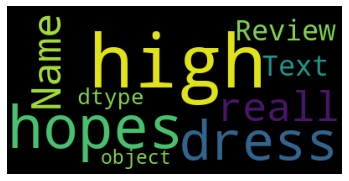

In [84]:
text = str(df[0:1]["Review Text"])
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Q4. Great!  Now you have to combine all the reviews and make a word cloud using it. Notice any differences in the image as compared to the previous question.

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


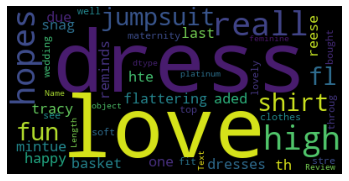

In [85]:
text_1 = str(df[0:]["Review Text"])
wordcloud=WordCloud().generate(text_1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Q5. Is there any correlation between age and rating? Note: you use can methods like scatter plot to find the correlation.

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


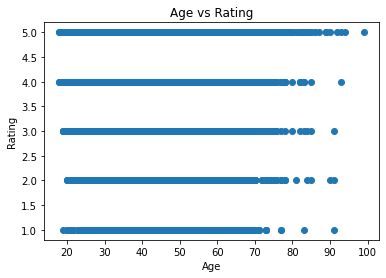

In [86]:
x=df.Age
y=df.Rating
plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Rating")
plt.title("Age vs Rating")
plt.show()

## Q6. Find the top 10 words using tf-idf? (rank words using idf values)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_2 = df[0:]["Review Text"]
vectorizer = TfidfVectorizer(stop_words="english")

X = vectorizer.fit_transform(text_2)
features = vectorizer.get_feature_names()
indices = np.argsort(vectorizer.idf_)[::-1]
print(features)
print(indices)
top_n=10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['00', '00p', '02', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite', '0r', '0verall', '0xs', '10', '100', '1000', '100lb', '100lbs', '101', '102', '102lbs', '103', '103lb', '103lbs', '104', '104lbs', '105', '105lb', '105lbs', '106', '106lbs', '107', '107lb', '107lbs', '107pound', '108', '108lbs', '109', '109lbs', '10l', '10lbs', '10mths', '10p', '10s', '10th', '10x', '11', '110', '110lb', '110lbs', '111', '111lbs', '112', '112lb', '112lbs', '112llbs', '113', '113lbs', '114', '114lb', '114lbs', '115', '115ish', '115lbs', '115llbs', '116', '116bs', '116ibs', '116lb', '116lbs', '117', '117bl', '117lbs', '118', '118lb', '118lbs', '119', '11and', '11inches', '12', '120', '120lb', '120lbs', '121', '122', '122lb', '122lbs', '123', '123lb', '123lbs', '123lbssize', '124', '124lb', '124lbs', '125', '125b', '125ibs', '125ish', '125lb', '125lbs', '126', '127', '127lb', '127lbs', '128', '128b', '128lb', '128lbs', '129', '129lbs', '12p', '13', '130', '130b', '130ibs', '130lb', '130lbs', '130

## Q7. Apply LDA on the number the 'review text' column and find various topics. As the number of topics are not known a prior, you may have to try various values for exmaple, start with 50 topic and go till 500 topics, so on..


In [88]:
# Create a listof text items
data=[x for x in text_2]
data

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",
 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!',
 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of

In [89]:
import gensim.corpora as corpora
import gensim
from pprint import pprint
from gensim.models.ldamulticore import LdaMulticore
from nltk.corpus import stopwords

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
token_data=[]
stop_words = stopwords.words('english')
for review in data:
    tokens=review.split()
    token_data.append(tokens)
token_data = [[word for word in doc if word not in stop_words] for doc in token_data]
token_data

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['I',
  'high',
  'hopes',
  'dress',
  'really',
  'wanted',
  'work',
  'me.',
  'initially',
  'ordered',
  'petite',
  'small',
  '(my',
  'usual',
  'size)',
  'found',
  'outrageously',
  'small.',
  'small',
  'fact',
  'could',
  'zip',
  'up!',
  'reordered',
  'petite',
  'medium,',
  'ok.',
  'overall,',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely,',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  '(net)',
  'layers.',
  'imo,',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  '-',
  'c'],
 ['I',
  'love,',
  'love,',
  'love',
  'jumpsuit.',
  'fun,',
  'flirty,',
  'fabulous!',
  'every',
  'time',
  'wear',
  'it,',
  'get',
  'nothing',
  'great',
  'compliments!'],
 ['This',
  'shirt',
  'flattering',
  'due',
  'adjustable',
  'front',
  'tie.',
  'perfect',
  'length',
  'wear',
  'leggings',
  'sleeveless',
  'pairs',
  'well',
  'cardigan.',
  'love',
  'shirt!!!'],
 ['I',
  'l

In [91]:
dictionary = corpora.Dictionary(token_data)
print(dictionary)
term_freq_corpus = [dictionary.doc2bow(text) for text in token_data]
print(term_freq_corpus)

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary(36174 unique tokens: ['(my', '(net)', '-', 'I', 'bottom']...)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [95]:
num_topics=200
lda_model = gensim.models.LdaMulticore(corpus=term_freq_corpus,
                                      id2word=dictionary,
                                      num_topics=num_topics)
pprint(lda_model.print_topics())

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(52,
  '0.014*"dress" + 0.011*"love" + 0.011*"I" + 0.010*"like" + 0.010*"size" + '
  '0.008*"would" + 0.007*"fit" + 0.007*"looks" + 0.007*"fabric" + '
  '0.006*"wear"'),
 (163,
  '0.014*"size" + 0.012*"love" + 0.011*"like" + 0.010*"dress" + 0.010*"i\'m" + '
  '0.009*"look" + 0.009*"fit" + 0.008*"I" + 0.008*"would" + 0.008*"wear"'),
 (187,
  '0.017*"dress" + 0.012*"I" + 0.011*"like" + 0.010*"top" + 0.007*"love" + '
  '0.006*"wear" + 0.006*"really" + 0.006*"it." + 0.005*"fabric" + '
  '0.005*"look"'),
 (86,
  '0.013*"size" + 0.011*"i\'m" + 0.010*"dress" + 0.009*"like" + 0.009*"love" + '
  '0.008*"I" + 0.008*"fabric" + 0.007*"really" + 0.006*"bit" + 0.006*"top"'),
 (181,
  '0.013*"I" + 0.013*"love" + 0.010*"wear" + 0.009*"fit" + 0.008*"size" + '
  '0.007*"would" + 0.007*"dress" + 0.007*"like" + 0.007*"i\'m" + '
  '0.007*"great"'),
 (164,
  '0.015*"wear" + 0.012*"I" + 0.010*"fit" + 0.010*"size" + 0.009*"dress" + '
  '0.007*"top" + 0.007*"like" + 0.007*"i\'m" + 0.007*"really" + '
  '0.005*

## Q8. Visualize the topics obtained in the previous question?

In [96]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=lda_model,
                             corpus=term_freq_corpus,
                             dictionary=dictionary,
                             mds='mmds')
pyLDAvis.display(vis)

D:\OneDrive - University of Keele\jupyter\env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Credit:
### 1. Word cloud tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python
### 2. tf-idf : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
### 3. Prinintg top n-terms in tf-idf: https://stackoverflow.com/questions/25217510/how-to-see-top-n-entries-of-term-document-matrix-after-tfidf-in-scikit-learn/25219535
### 4. More analysis using LDA: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/